In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
p1 = pd.read_csv('experimentation/prices_round_4_day_1.csv', sep=';')
p2 = pd.read_csv('experimentation/prices_round_4_day_2.csv', sep=';')
p3 = pd.read_csv('experimentation/prices_round_4_day_3.csv', sep=';')


In [3]:
# List of products you're interested in
products = ["PICNIC_BASKET1", "PICNIC_BASKET2", "JAMS", "DJEMBES", "CROISSANTS"]

# Replace reset_index with set_index on 'timestamp'
day_product_dfs = {
    "day1": {product: p1[p1["product"] == product].copy().set_index("timestamp") for product in products},
    "day2": {product: p2[p2["product"] == product].copy().set_index("timestamp") for product in products},
    "day3": {product: p3[p3["product"] == product].copy().set_index("timestamp") for product in products},
}


In [4]:
def plot_dual_axis(df1, col1, df2, col2, title=None, color1='tab:blue', color2='tab:orange', xlim=None):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Filter by xlim if provided
    if xlim:
        df1_plot = df1[(df1.index >= xlim[0]) & (df1.index <= xlim[1])]
        df2_plot = df2[(df2.index >= xlim[0]) & (df2.index <= xlim[1])]
    else:
        df1_plot = df1
        df2_plot = df2

    ax1.plot(df1_plot.index, df1_plot[col1], color=color1, label=col1)
    ax1.set_xlabel("Timestamp")
    ax1.set_ylabel(col1, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    if xlim:
        ax1.set_xlim(xlim)
        ax1.set_ylim(df1_plot[col1].min(), df1_plot[col1].max())

    ax2 = ax1.twinx()
    ax2.plot(df2_plot.index, df2_plot[col2], color=color2, label=col2)
    ax2.set_ylabel(col2, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    if xlim:
        ax2.set_ylim(df2_plot[col2].min(), df2_plot[col2].max())

    plt.title(title or f"{col1} (left) vs {col2} (right) over time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_single_axis(df, col, title=None, color='tab:blue', xlim=None):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[col], color=color, label=col)
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.title(title or f"{col} over time")
    plt.grid(True)

    if xlim:
        plt.xlim(xlim)  # xlim should be a tuple like (start, end)

    plt.tight_layout()
    plt.show()



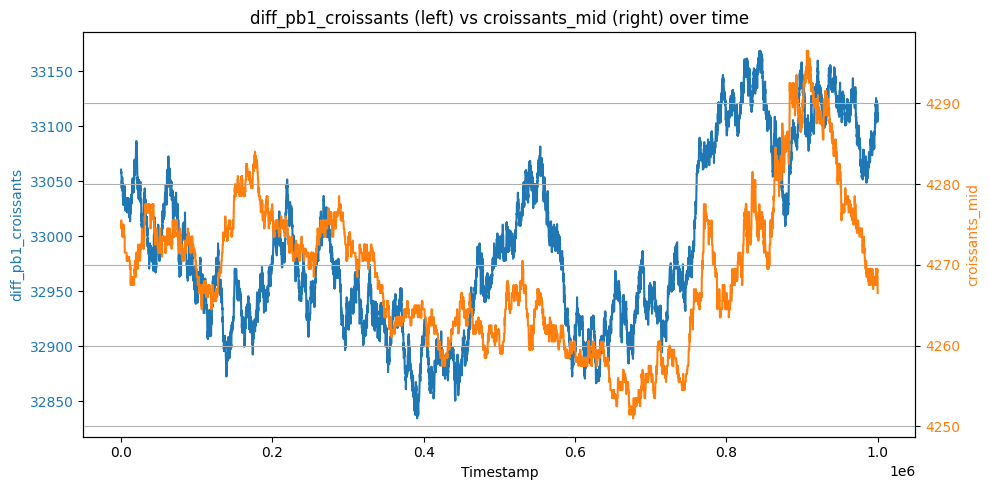

In [22]:
# Grab the two DataFrames from day1
pb1 = day_product_dfs["day1"]["PICNIC_BASKET1"]
croissants = day_product_dfs["day1"]["CROISSANTS"]

# Align the two DataFrames on timestamp (just in case timestamps aren't identical)
merged = pb1[["mid_price"]].rename(columns={"mid_price": "pb1_mid"}).join(
    croissants[["mid_price"]].rename(columns={"mid_price": "croissants_mid"}),
    how="inner"
)

# Compute difference
merged["diff_pb1_croissants"] = merged["pb1_mid"] - (6 * merged["croissants_mid"])

plot_dual_axis(merged, 'diff_pb1_croissants', merged, 'croissants_mid')
#plot_single_axis(merged, 'diff_pb1_croissants')

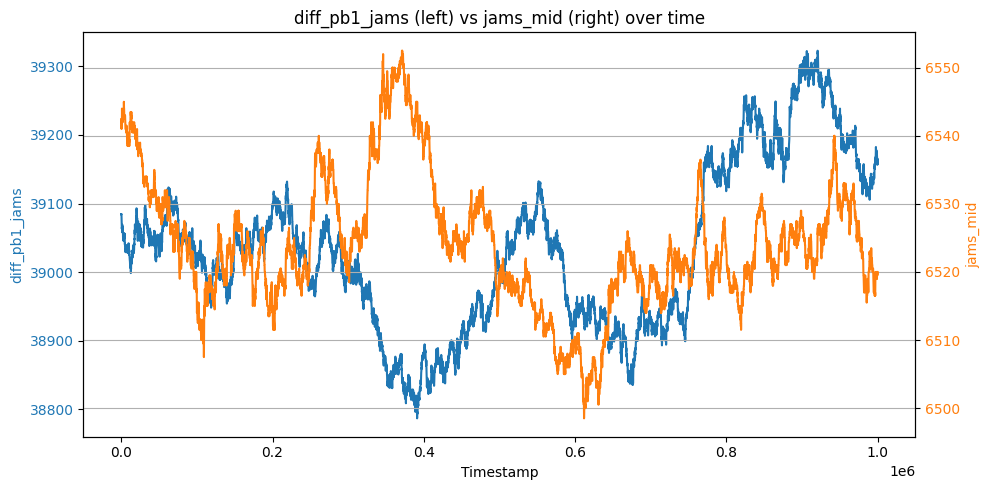

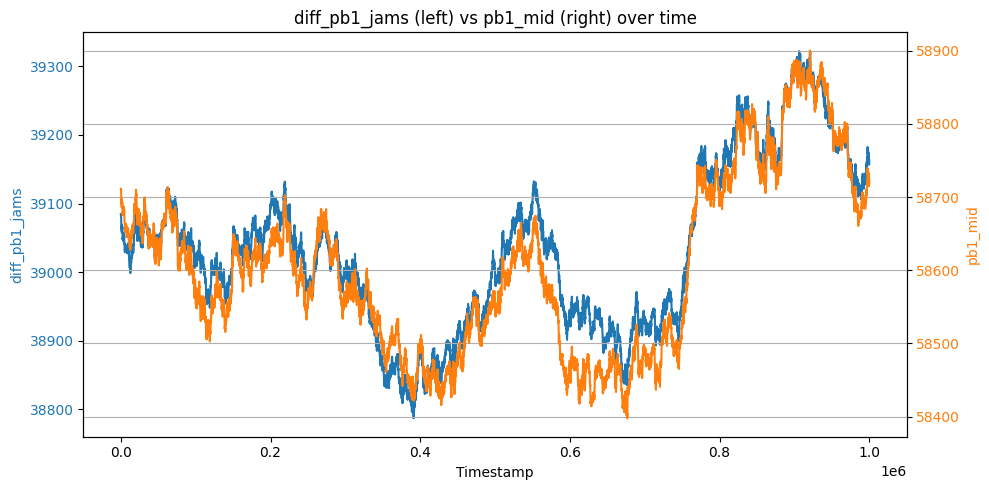

In [25]:
# Grab the two DataFrames from day1
pb1 = day_product_dfs["day1"]["PICNIC_BASKET1"]
croissants = day_product_dfs["day1"]["JAMS"]

# Align the two DataFrames on timestamp (just in case timestamps aren't identical)
merged = pb1[["mid_price"]].rename(columns={"mid_price": "pb1_mid"}).join(
    croissants[["mid_price"]].rename(columns={"mid_price": "jams_mid"}),
    how="inner"
)

# Compute difference
merged["diff_pb1_jams"] = merged["pb1_mid"] - (3 * merged["jams_mid"])

plot_dual_axis(merged, 'diff_pb1_jams', merged, 'jams_mid')
plot_dual_axis(merged, 'diff_pb1_jams', merged, 'pb1_mid')

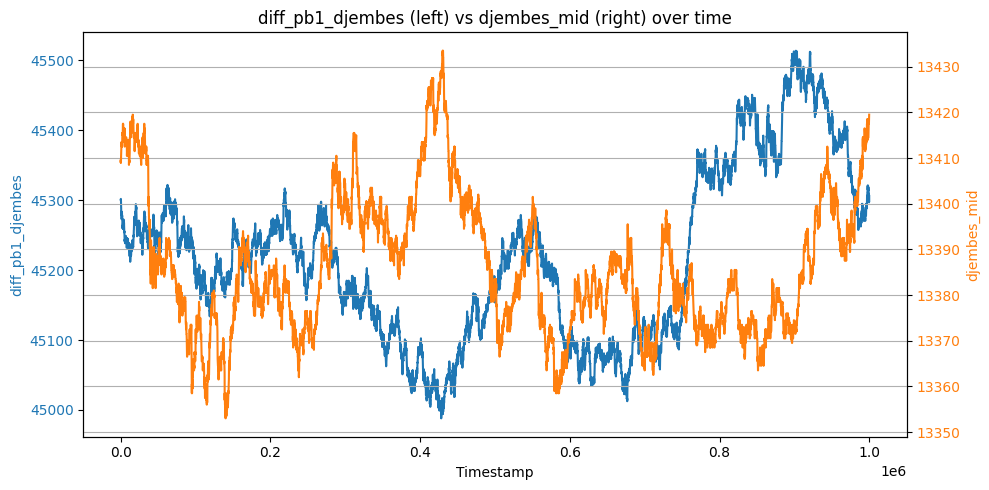

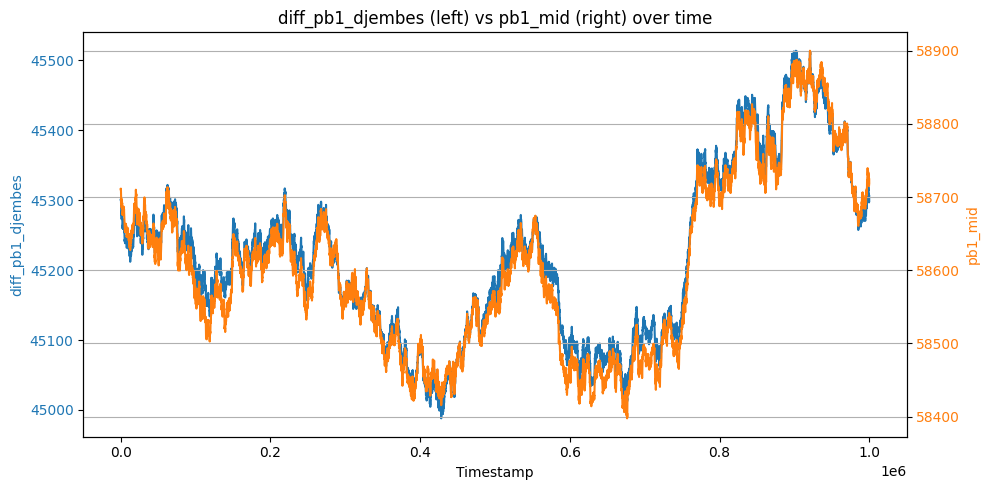

In [27]:
# Grab the two DataFrames from day1
pb1 = day_product_dfs["day1"]["PICNIC_BASKET1"]
croissants = day_product_dfs["day1"]["DJEMBES"]

# Align the two DataFrames on timestamp (just in case timestamps aren't identical)
merged = pb1[["mid_price"]].rename(columns={"mid_price": "pb1_mid"}).join(
    croissants[["mid_price"]].rename(columns={"mid_price": "djembes_mid"}),
    how="inner"
)

# Compute difference
merged["diff_pb1_djembes"] = merged["pb1_mid"] - (merged["djembes_mid"])

plot_dual_axis(merged, 'diff_pb1_djembes', merged, 'djembes_mid')
plot_dual_axis(merged, 'diff_pb1_djembes', merged, 'pb1_mid')

In [34]:
pb1 = day_product_dfs["day1"]["PICNIC_BASKET1"]
cro = day_product_dfs["day1"]["CROISSANTS"]
jam = day_product_dfs["day1"]["JAMS"]
djembe = day_product_dfs["day1"]["DJEMBES"]

# Merge on timestamp
merged = pb1[["mid_price"]].rename(columns={"mid_price": "pb1_mid"}).join([
    cro[["mid_price"]].rename(columns={"mid_price": "cro_mid"}),
    jam[["mid_price"]].rename(columns={"mid_price": "jam_mid"}),
    djembe[["mid_price"]].rename(columns={"mid_price": "dje_mid"})
], how="inner")

# Compute synthetic price of PB1
merged["synthetic_pb1"] = 6 * merged["cro_mid"] + 3 * merged["jam_mid"] + 1 * merged["dje_mid"]

# Compute diff
merged["pb1_vs_synth"] = merged["pb1_mid"] - merged["synthetic_pb1"]

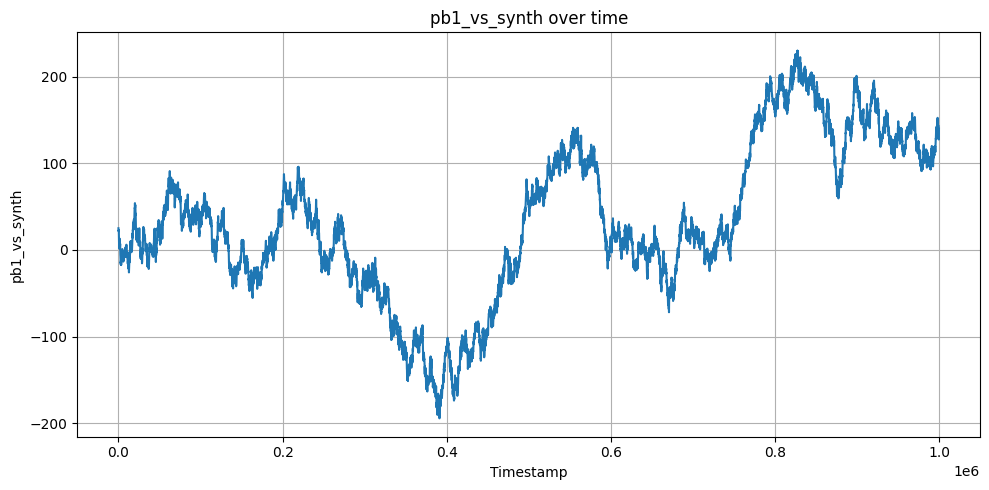

In [35]:
plot_single_axis(merged, 'pb1_vs_synth')

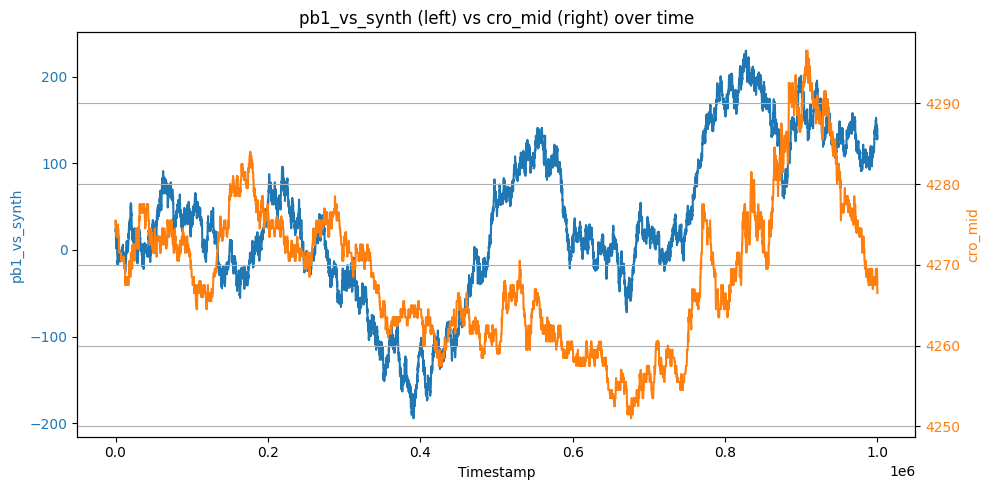

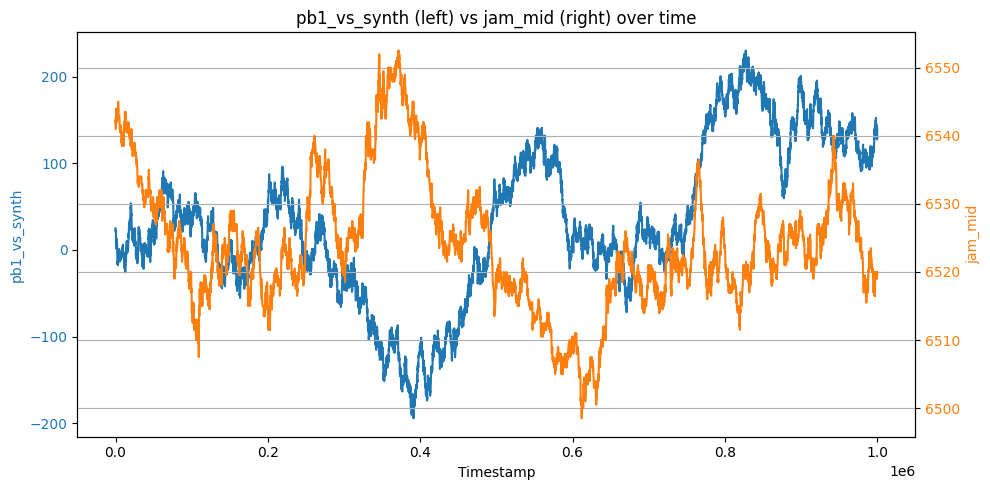

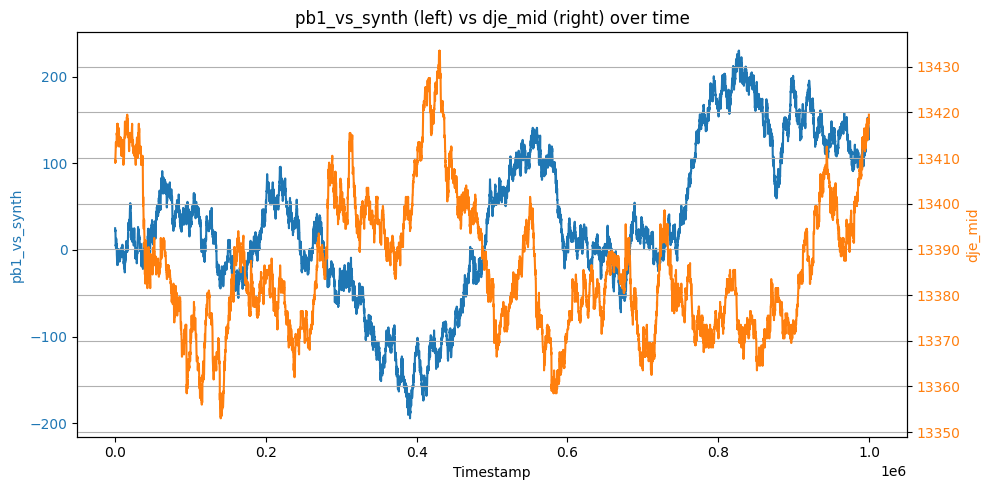

In [36]:
plot_dual_axis(merged, 'pb1_vs_synth', merged, 'cro_mid')
plot_dual_axis(merged, 'pb1_vs_synth', merged, 'jam_mid')
plot_dual_axis(merged, 'pb1_vs_synth', merged, 'dje_mid')

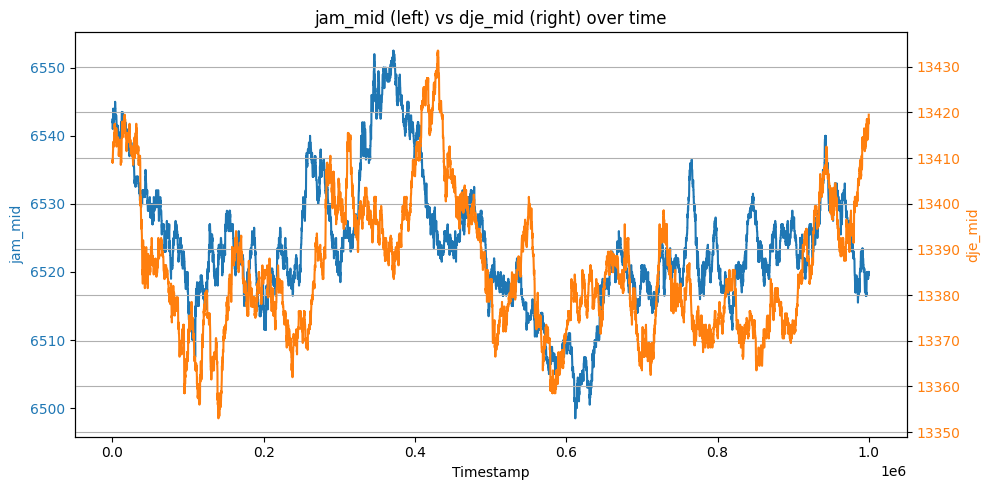

In [37]:
plot_dual_axis(merged, 'jam_mid', merged, 'dje_mid')

In [49]:
def get_merged_day(pb1, cro, jam, djembe, ts_offset):
    df = pb1[["mid_price"]].rename(columns={"mid_price": "pb1_mid"}).join([
        cro[["mid_price"]].rename(columns={"mid_price": "cro_mid"}),
        jam[["mid_price"]].rename(columns={"mid_price": "jam_mid"}),
        djembe[["mid_price"]].rename(columns={"mid_price": "djembe_mid"})
    ], how="inner")
    df = df.copy()
    df["timestamp"] = df.index + ts_offset
    df.set_index("timestamp", inplace=True)
    return df

m1 = get_merged_day(
    day_product_dfs["day1"]["PICNIC_BASKET1"],
    day_product_dfs["day1"]["CROISSANTS"],
    day_product_dfs["day1"]["JAMS"],
    day_product_dfs["day1"]["DJEMBES"],
    0
)
m2 = get_merged_day(
    day_product_dfs["day2"]["PICNIC_BASKET1"],
    day_product_dfs["day2"]["CROISSANTS"],
    day_product_dfs["day2"]["JAMS"],
    day_product_dfs["day2"]["DJEMBES"],
    1_000_000
)
m3 = get_merged_day(
    day_product_dfs["day3"]["PICNIC_BASKET1"],
    day_product_dfs["day3"]["CROISSANTS"],
    day_product_dfs["day3"]["JAMS"],
    day_product_dfs["day3"]["DJEMBES"],
    2_000_000
)

pb1_all = pd.concat([m1, m2, m3])
pb1_all["synthetic_pb1"] = 6 * pb1_all["cro_mid"] + 3 * pb1_all["jam_mid"] + pb1_all["djembe_mid"]
pb1_all["pb1_vs_synth"] = pb1_all["pb1_mid"] - pb1_all["synthetic_pb1"]

plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [65]:
def get_merged_day(pb1, cro, jam, djembe, ts_offset):
    df = pb1[["mid_price"]].rename(columns={"mid_price": "pb1_mid"}).join([
        cro[["mid_price"]].rename(columns={"mid_price": "cro_mid"}),
        jam[["mid_price"]].rename(columns={"mid_price": "jam_mid"}),
        djembe[["mid_price"]].rename(columns={"mid_price": "dje_mid"})
    ], how="inner")
    df = df.copy()
    df["timestamp"] = df.index + ts_offset
    df.set_index("timestamp", inplace=True)
    return df

m1 = get_merged_day(
    day_product_dfs["day1"]["PICNIC_BASKET1"],
    day_product_dfs["day1"]["CROISSANTS"],
    day_product_dfs["day1"]["JAMS"],
    day_product_dfs["day1"]["DJEMBES"],
    0
)
m2 = get_merged_day(
    day_product_dfs["day2"]["PICNIC_BASKET1"],
    day_product_dfs["day2"]["CROISSANTS"],
    day_product_dfs["day2"]["JAMS"],
    day_product_dfs["day2"]["DJEMBES"],
    1_000_000
)
m3 = get_merged_day(
    day_product_dfs["day3"]["PICNIC_BASKET1"],
    day_product_dfs["day3"]["CROISSANTS"],
    day_product_dfs["day3"]["JAMS"],
    day_product_dfs["day3"]["DJEMBES"],
    2_000_000
)

pb1_all = pd.concat([m1, m2, m3])
pb1_all["synthetic_pb1"] = 6 * pb1_all["cro_mid"] + 3 * pb1_all["jam_mid"] + pb1_all["dje_mid"]
pb1_all["pb1_vs_synth"] = pb1_all["pb1_mid"] - pb1_all["synthetic_pb1"]


def get_merged_pb2_day(pb2, cro, jam, ts_offset):
    df = pb2[["mid_price"]].rename(columns={"mid_price": "pb2_mid"}).join([
        cro[["mid_price"]].rename(columns={"mid_price": "cro_mid"}),
        jam[["mid_price"]].rename(columns={"mid_price": "jam_mid"})
    ], how="inner")
    df = df.copy()
    df["timestamp"] = df.index + ts_offset
    df.set_index("timestamp", inplace=True)
    return df

pb2_m1 = get_merged_pb2_day(
    day_product_dfs["day1"]["PICNIC_BASKET2"],
    day_product_dfs["day1"]["CROISSANTS"],
    day_product_dfs["day1"]["JAMS"],
    0
)
pb2_m2 = get_merged_pb2_day(
    day_product_dfs["day2"]["PICNIC_BASKET2"],
    day_product_dfs["day2"]["CROISSANTS"],
    day_product_dfs["day2"]["JAMS"],
    1_000_000
)
pb2_m3 = get_merged_pb2_day(
    day_product_dfs["day3"]["PICNIC_BASKET2"],
    day_product_dfs["day3"]["CROISSANTS"],
    day_product_dfs["day3"]["JAMS"],
    2_000_000
)

pb2_all = pd.concat([pb2_m1, pb2_m2, pb2_m3])
pb2_all["synthetic_pb2"] = 3 * pb2_all["cro_mid"] + 2 * pb2_all["jam_mid"]
pb2_all["pb2_vs_synth"] = pb2_all["pb2_mid"] - pb2_all["synthetic_pb2"]

pb1_all = pd.concat([m1, m2, m3])
pb1_all["synthetic_pb1"] = 6 * pb1_all["cro_mid"] + 3 * pb1_all["jam_mid"] + pb1_all["dje_mid"]
pb1_all["pb1_vs_synth"] = pb1_all["pb1_mid"] - pb1_all["synthetic_pb1"]


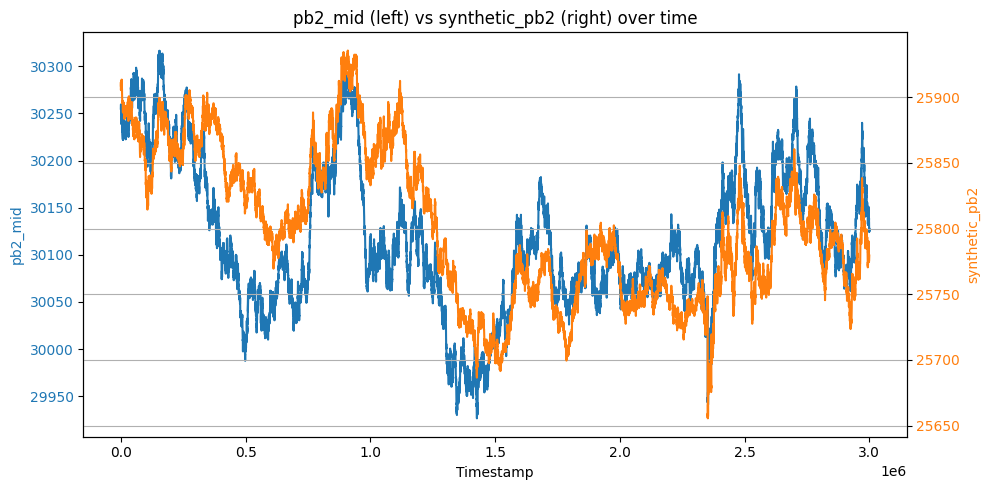

In [66]:
plot_dual_axis(pb2_all, 'pb2_mid', pb2_all, 'synthetic_pb2')

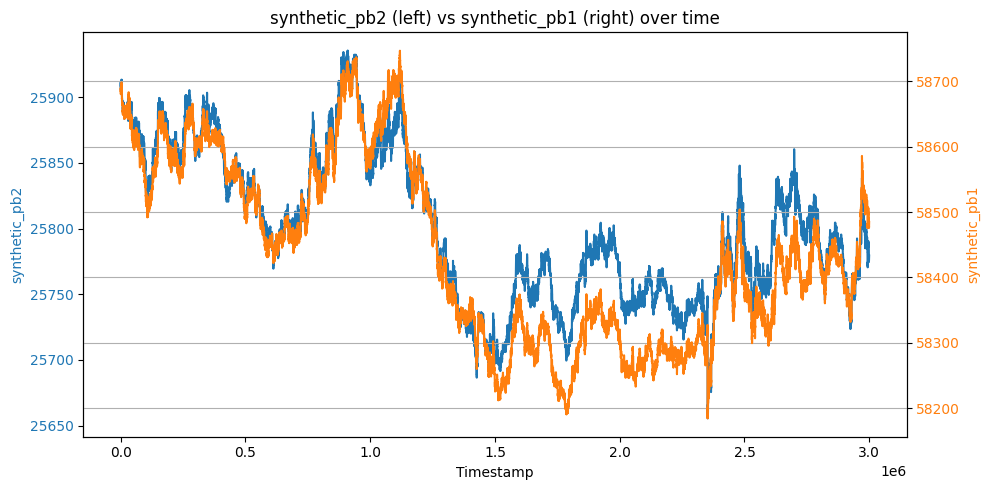

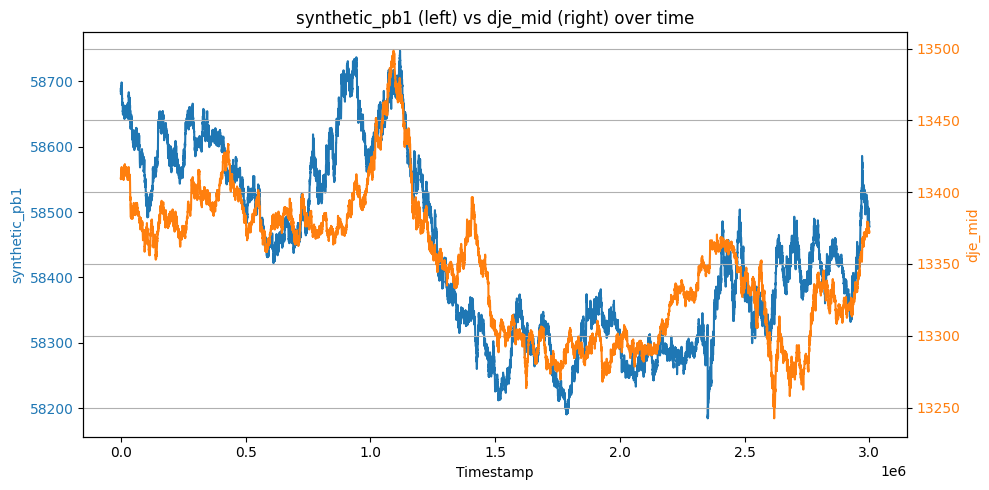

In [72]:
plot_dual_axis(pb2_all, 'synthetic_pb2', pb1_all, 'synthetic_pb1')
plot_dual_axis(pb1_all, 'synthetic_pb1', pb1_all, 'dje_mid')

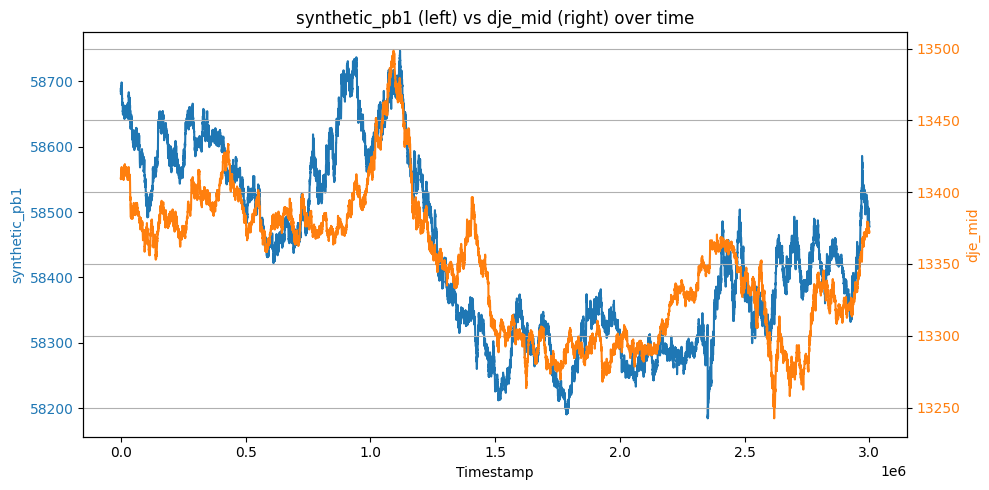

In [80]:
plot_dual_axis(pb1_all, 'synthetic_pb1', pb1_all, 'dje_mid') #, xlim =(1_000_000, 1_200_000))

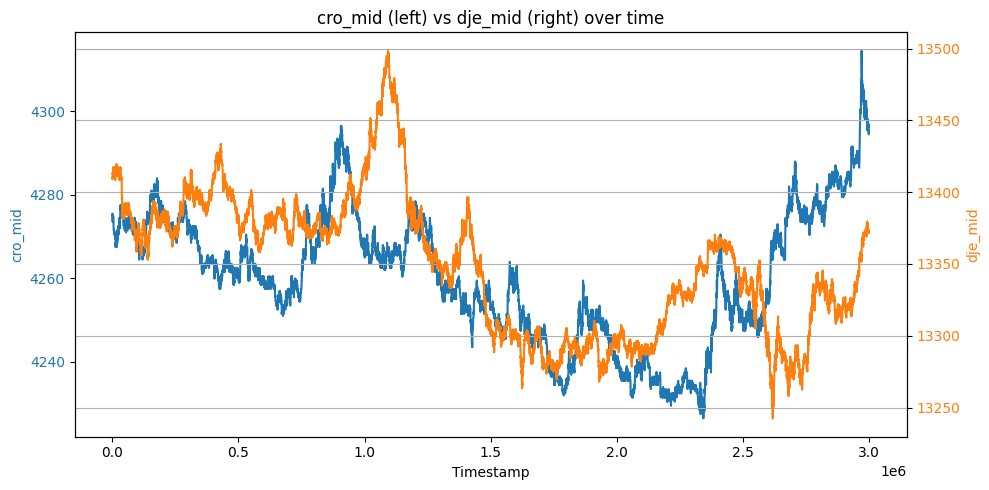

In [79]:
plot_dual_axis(pb1_all, 'cro_mid', pb1_all, 'dje_mid') #, xlim =(1_000_000, 1_200_000))

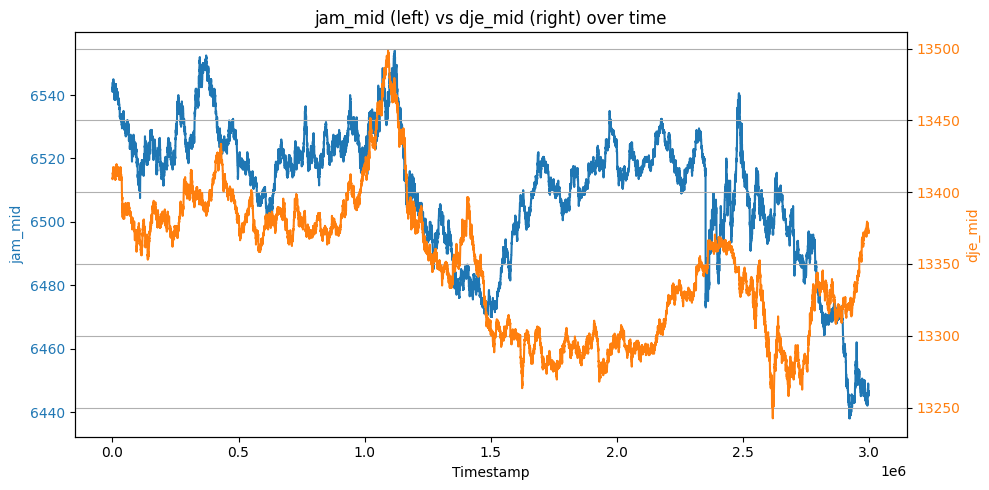

In [81]:
plot_dual_axis(pb1_all, 'jam_mid', pb1_all, 'dje_mid') #, xlim =(1_000_000, 1_200_000))

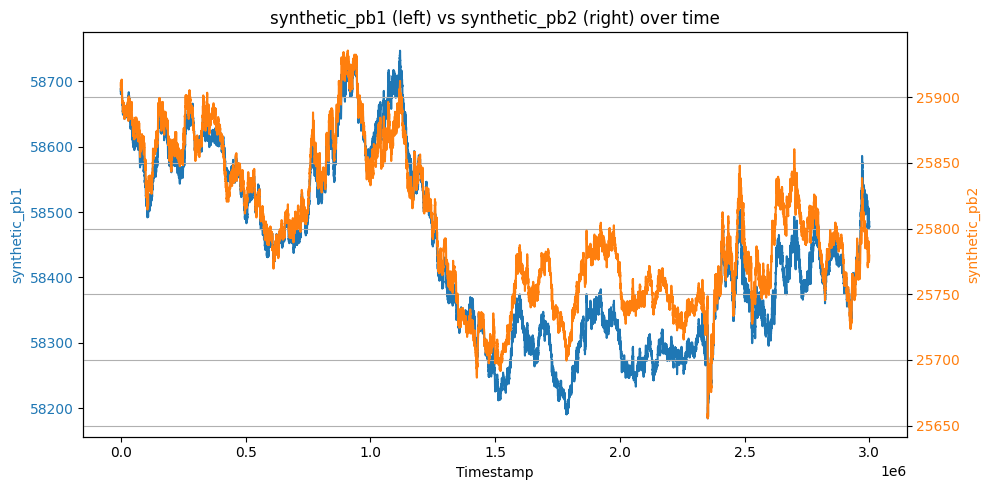

In [82]:
plot_dual_axis(pb1_all, 'synthetic_pb1', pb2_all, 'synthetic_pb2') #, xlim =(1_000_000, 1_200_000s

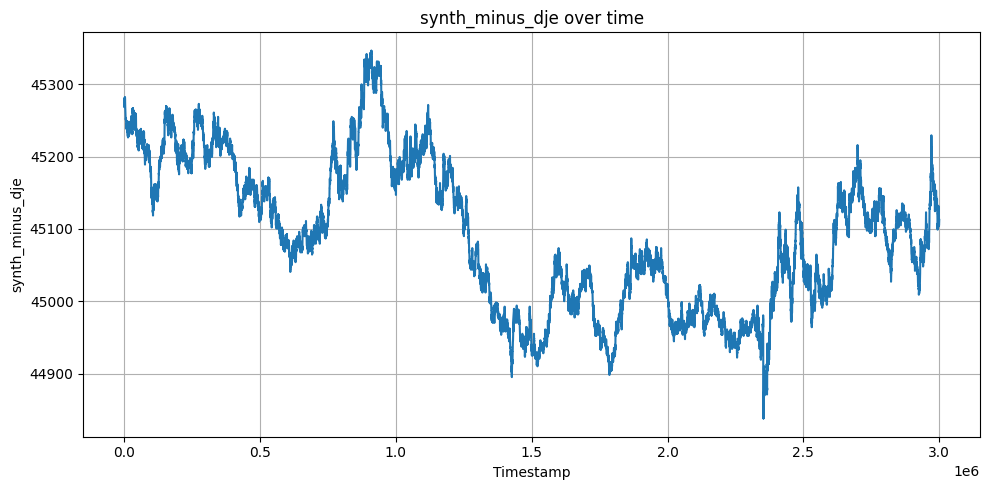

In [91]:
pb1_all["synth_minus_dje"] = pb1_all["synthetic_pb1"] - pb1_all["dje_mid"]
plot_single_axis(pb1_all, 'synth_minus_dje')

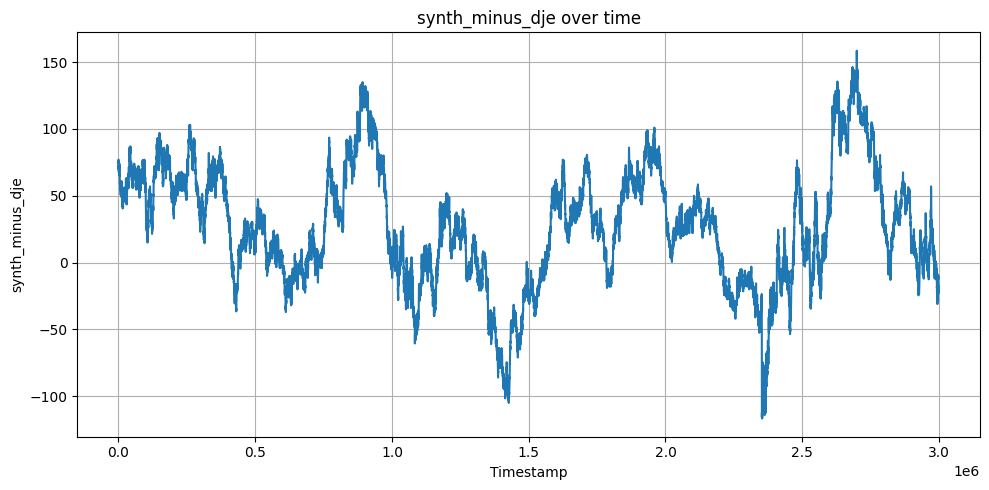

In [94]:
pb2_all["synth_minus_dje"] = pb2_all["synthetic_pb2"] - pb1_all["dje_mid"] - 12425
plot_single_axis(pb2_all, 'synth_minus_dje')

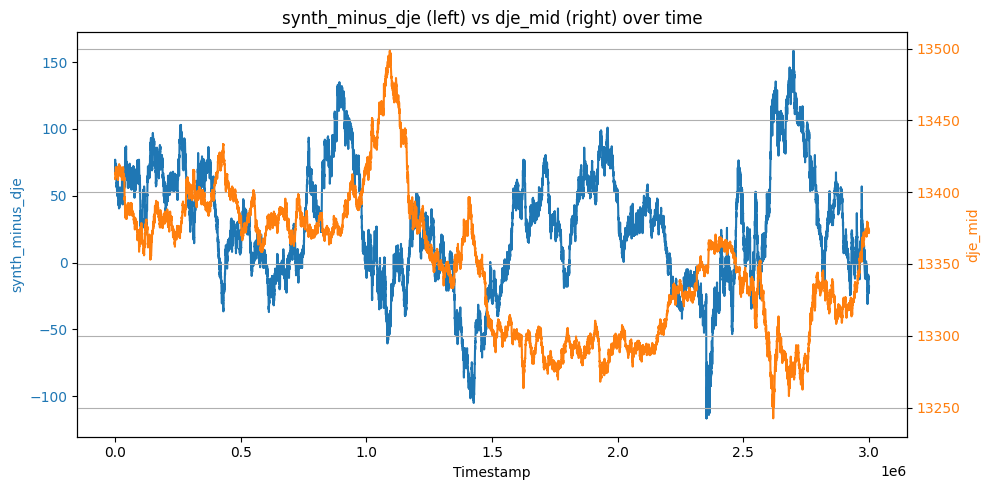

In [97]:
plot_dual_axis(pb2_all, 'synth_minus_dje', pb1_all, 'dje_mid')

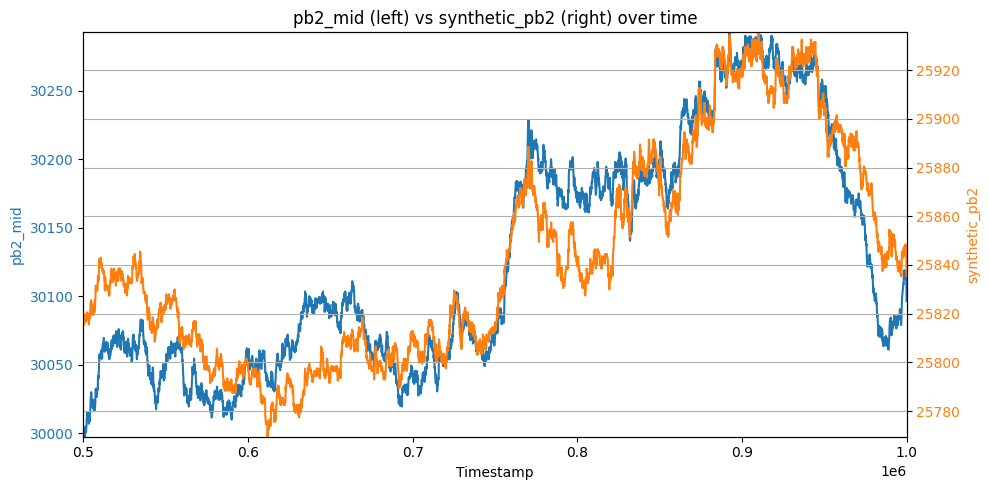

In [108]:
plot_dual_axis(pb2_all, 'pb2_mid', pb2_all, 'synthetic_pb2', xlim=(500_000, 1_000_000))

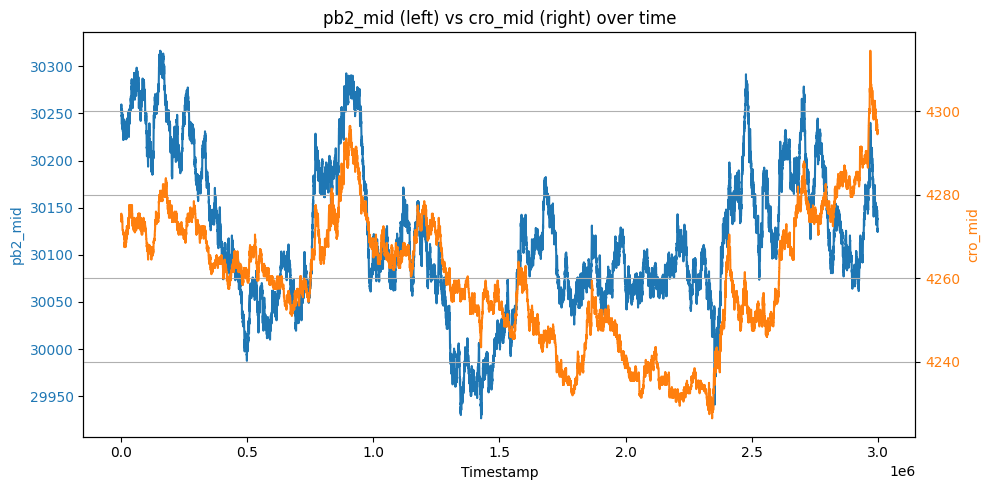

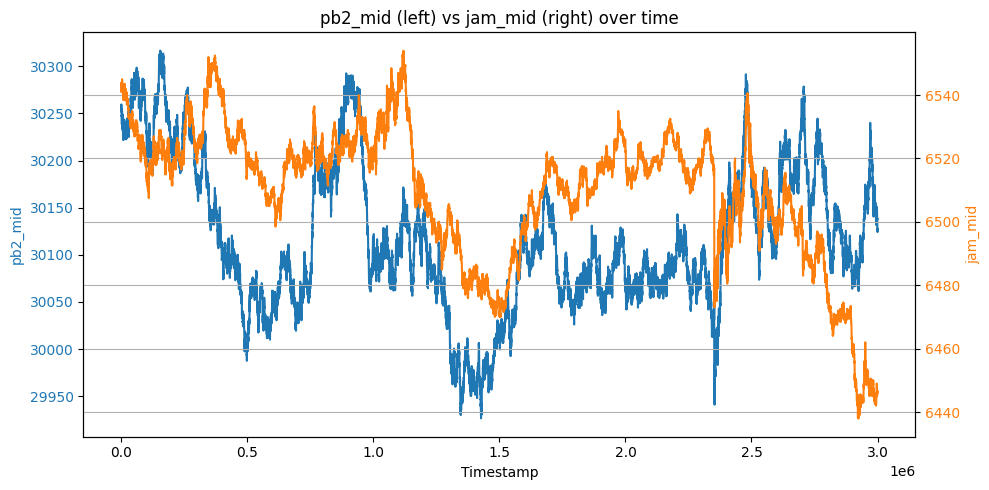

In [105]:
plot_dual_axis(pb2_all, 'pb2_mid', pb1_all, 'cro_mid')
plot_dual_axis(pb2_all, 'pb2_mid', pb1_all, 'jam_mid')

In [106]:
mean_diff_pb2 = (pb2_all["pb2_mid"] - pb2_all["synthetic_pb2"]).mean()
print("Mean difference (PB2 - Synthetic PB2):", mean_diff_pb2)

Mean difference (PB2 - Synthetic PB2): 4317.179033333333


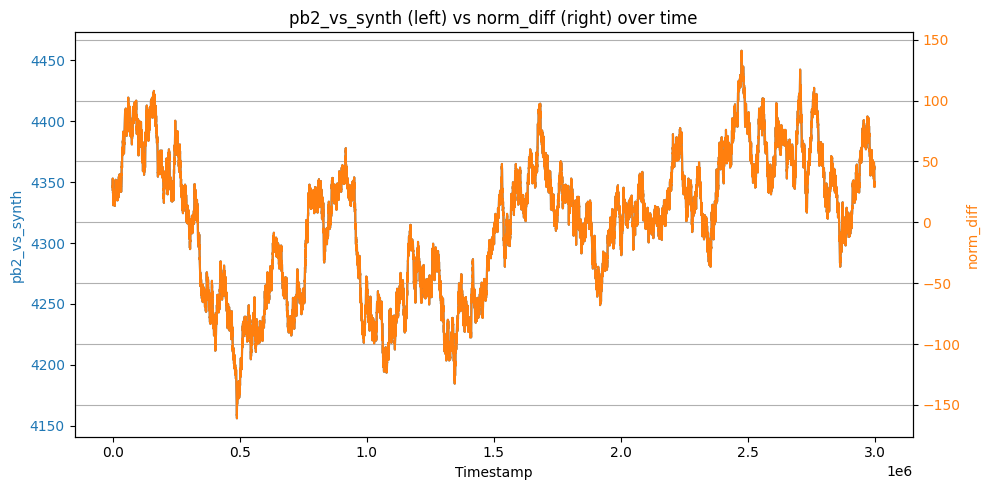

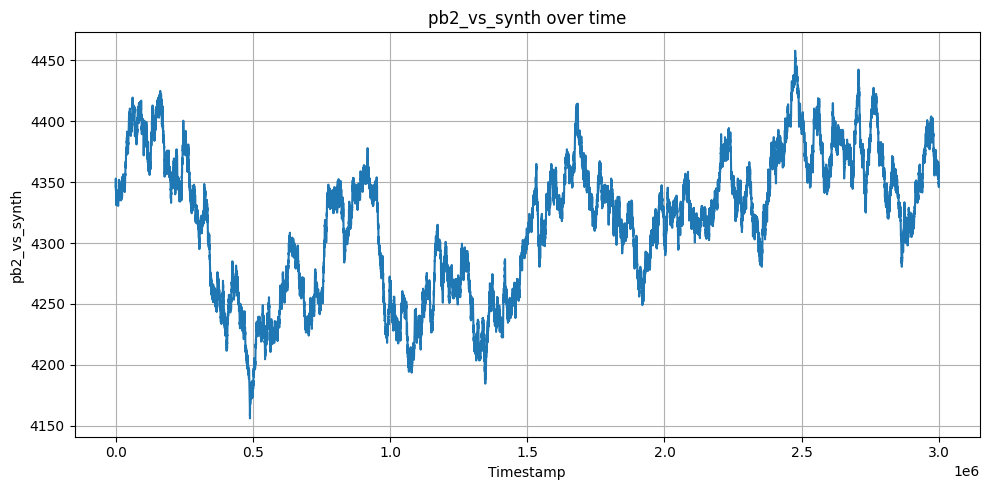

In [116]:
pb2_all['norm_diff'] = pb2_all['pb2_vs_synth'] - 4317
plot_dual_axis(pb2_all, 'pb2_vs_synth', pb2_all, 'norm_diff')
plot_single_axis(pb2_all, 'pb2_vs_synth')